In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                 
## used to write output in same notebook
import seaborn as sns
sns.set()
sns.set(style='darkgrid')

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn import tree   
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm

In [2]:
df = pd.read_csv(r"C:\Users\Lavanya Gandhi\Downloads\archive (3)\train_u6lujuX_CVtuZ9i.csv")
pred = pd.read_csv(r"C:\Users\Lavanya Gandhi\Downloads\archive (3)\test_Y3wMUE5_7gLdaTN.csv")

In [3]:
# Features/Column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# We have 12 independent variables and 1 target variable (Loan_Status) in train dataset

In [4]:
pred.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# We have 12 independent variables test dataset

In [5]:
# Dropping Loan_ID column- As Loan_ID is completely unique and not correlated with any of the other column 
df.drop(['Loan_ID'],axis=1,inplace=True)
pred.drop(['Loan_ID'],axis=1,inplace=True)

# Missing/Null Values & Outliers

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
num_feature= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

Q1 = df[num_feature].quantile(0.25)
Q3 = df[num_feature].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df[num_feature] < lower_bound) | (df[num_feature] > upper_bound)

In [8]:
# Count the number of outliers in each column
num_outliers = outliers.sum()

# Display columns with outliers
columns_with_outliers = num_outliers[num_outliers > 0].index
print("Columns with outliers:", columns_with_outliers)

Columns with outliers: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')


In [9]:
missing_values=('Gender', 'Married', 'Dependents', 'Credit_History', 'Self_Employed')
for a in missing_values:
    df[a].fillna(df[a].mode()[0], inplace=True)

In [10]:
# As loan amount has outliers use median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [11]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
## The value of 360 is repeating the most, with a stark difference between top two, So we replace missing values using mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df['Dependents'].replace('3+',3,inplace=True)

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,1,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
# Apply one-hot encoding to categorical columns
data = pd.get_dummies(df, columns=['Gender', 'Married', 'Self_Employed', 'Education', 'Property_Area'], drop_first=True)
#why do we use drop_first=True?
#The reason is to avoid a situation known as "dummy variable trap". When using one-hot encoding, if we include all N binary 
#columns, it creates multicollinearity among the variables. Multicollinearity can cause problems in some regression models like 
#linear regression, where the model assumes that the predictor variables are independent.

# Display the encoded dataset
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Education_1,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,Y,1,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,1,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1,0,1


In [19]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Education_1,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.817590,0.653094,0.133550,0.781759,0.379479,0.328990
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.476373,0.340446,0.413389,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

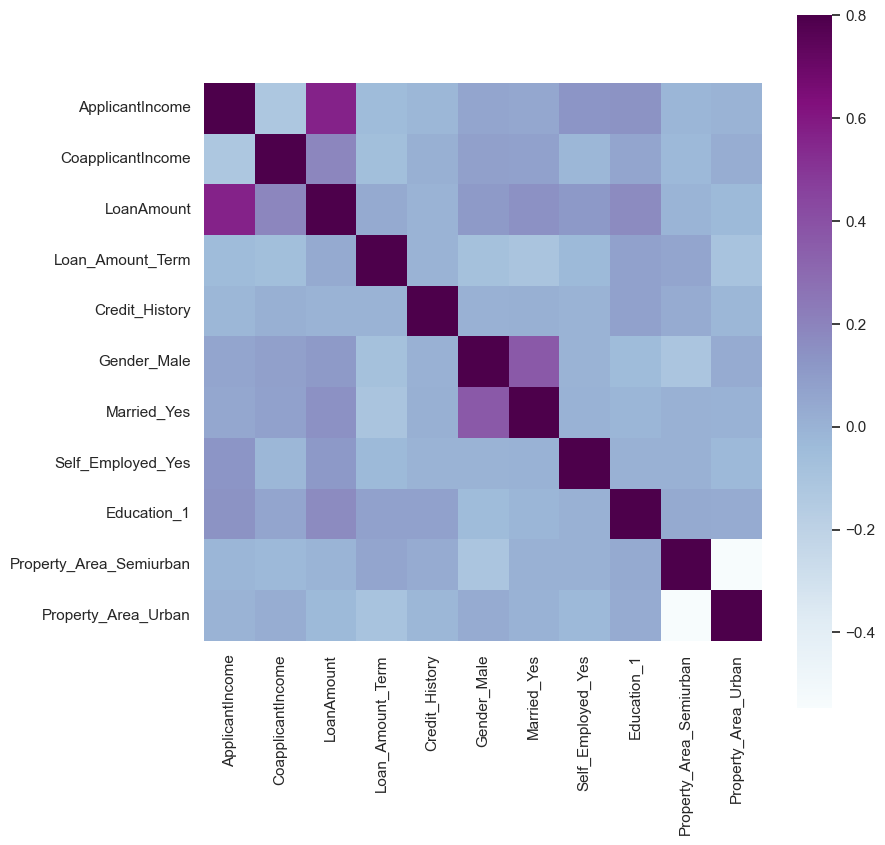

In [20]:
get_ipython().magic('matplotlib inline')
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True, cmap='BuPu')

In [21]:
# most correlated variables are (Applicant Income - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [22]:
data.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Self_Employed_Yes', 'Education_1',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [23]:
y = data['Loan_Status']
X = data.drop('Loan_Status', axis=1)


# Assuming 'X' is your feature matrix and 'y' is your target variable
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


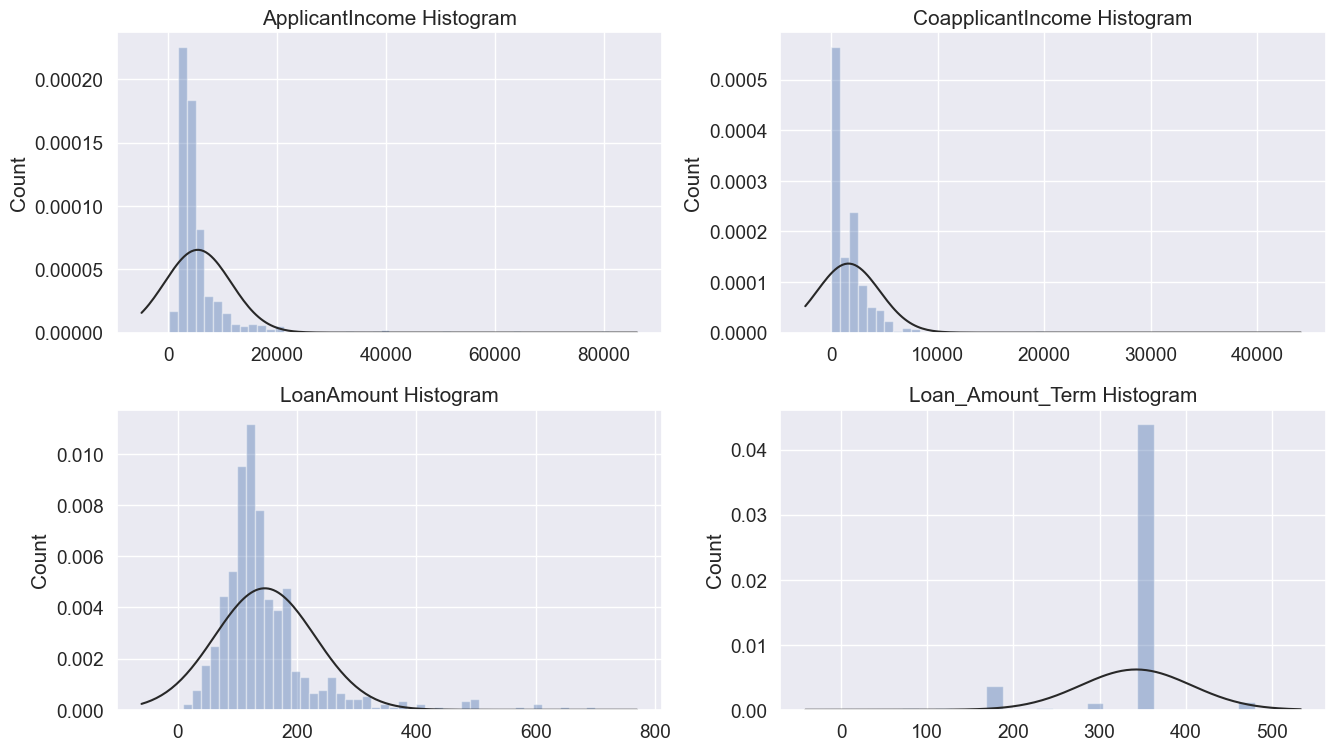

In [24]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 15)
sns.set(font_scale=1.25)

hists = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

i = 1
for var in hists:
    fig.add_subplot(4, 2, i)
    sns.distplot(pd.Series(data[var], name=''),
                fit=norm, kde=False).set_title(var + " Histogram")
    plt.ylabel('Count')
    i += 1

fig.tight_layout()
plt.show()

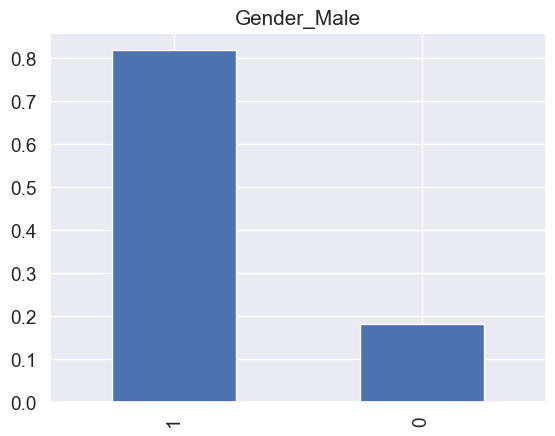

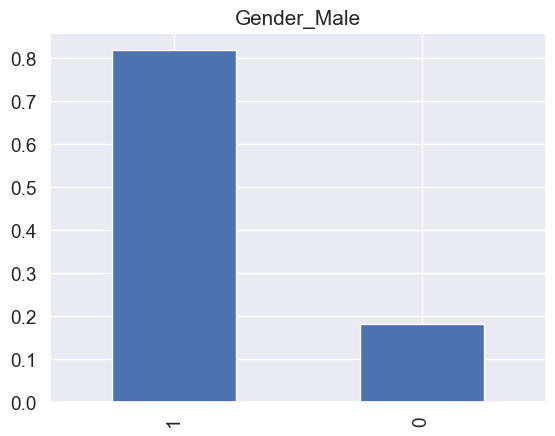

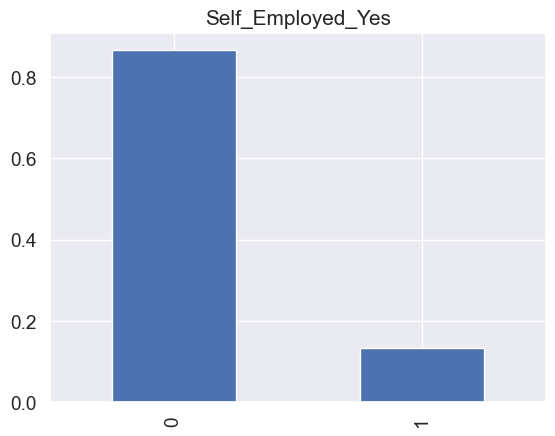

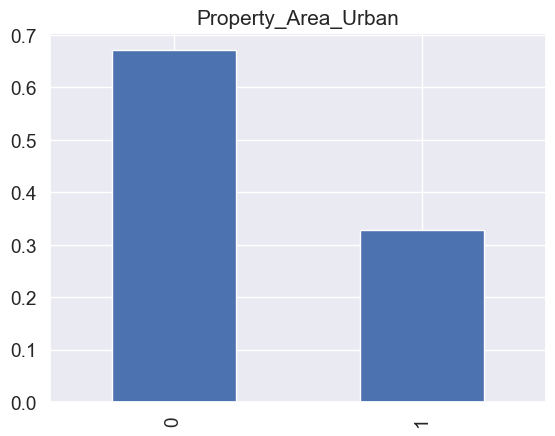

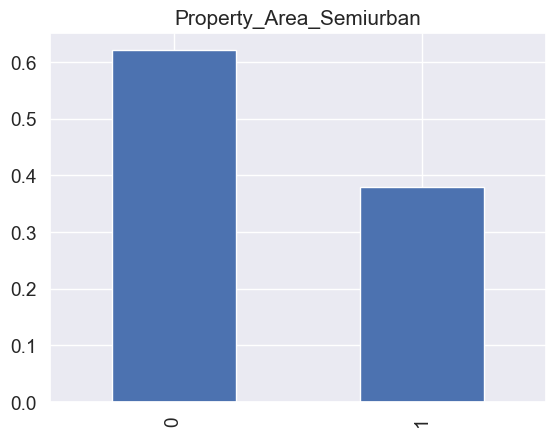

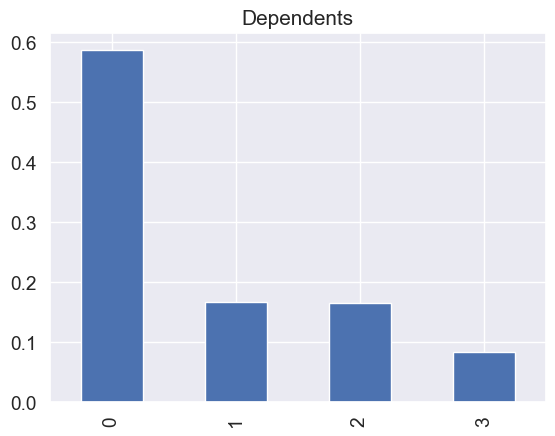

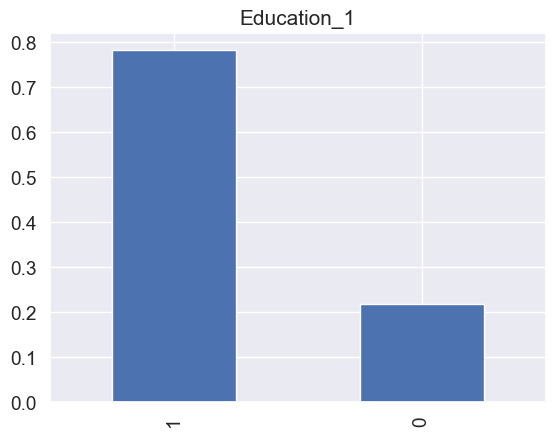

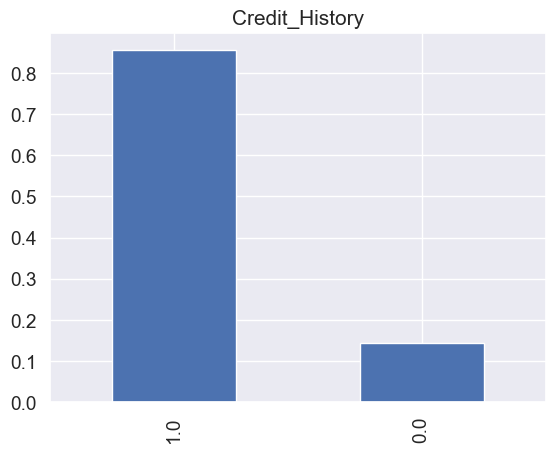

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


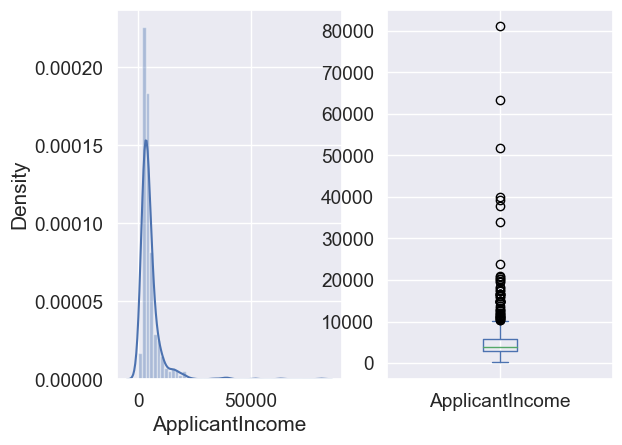

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


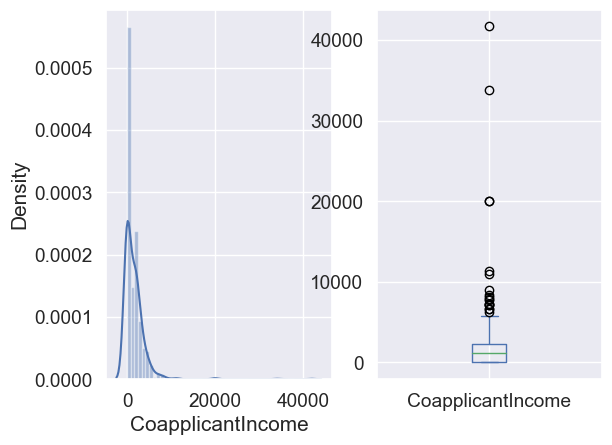

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


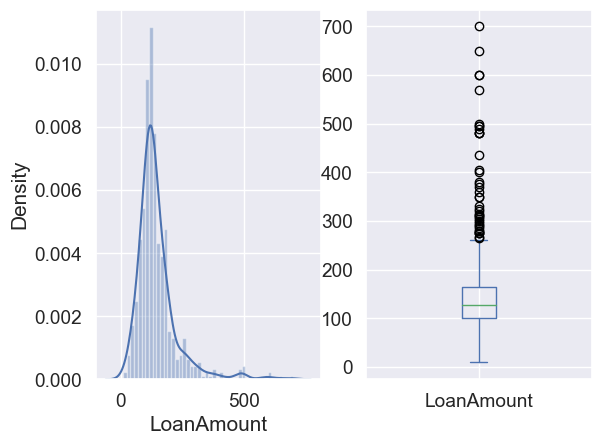

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


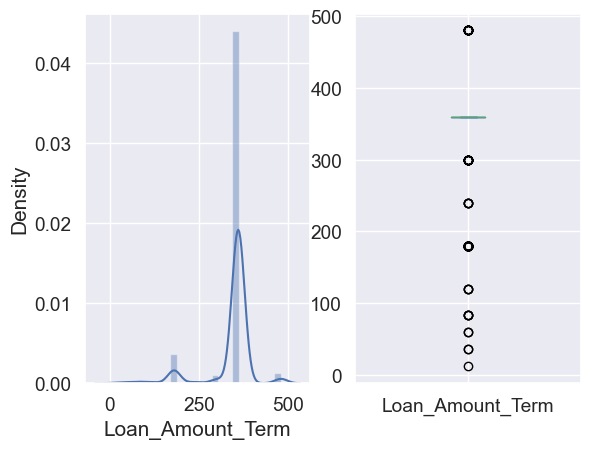

In [25]:
numerical_variables=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
ordinal_variables=['Dependents','Education_1','Credit_History']
categorical_variables=['Gender_Male','Gender_Male','Self_Employed_Yes','Property_Area_Urban', 'Property_Area_Semiurban']


for x in categorical_variables:
    data[x].value_counts(normalize=True).plot.bar(title=x)
    plt.show()
    
    
    
for y in ordinal_variables:
    data[y].value_counts(normalize=True).plot.bar(title=y)
    plt.show()
    
    
    

for z in numerical_variables:
    plt.figure(1)
    plt.subplot(121) 
    sns.distplot(data[z]);
    plt.subplot(122) 
    data[z].plot.box()
    plt.show()

In [26]:
#80% applicants in the dataset are male
#Around 65% applicants in the dataset are married
#Around 15% applicants in the dataset are self-employed
#Around 85% applicants in the dataset have repaid their debts 
#Most of the applicants don't have any dependents
#Around 80% applicants in the dataset are Graduate
#Most of the applicants are from Semiurban area

## Most data of Applicant Income is towards left- i.e. it is not normally distributed
## Boxplot confirms presence of outliers/extreme values- income disparity in society

## Most data of Coapplicant's Income is towards left- i.e. it is not normally distributed
## Boxplot confirms presence of outliers/extreme values- Coapplicant's Income

## data of Loan amount is fairly normal
## Boxplot confirms presence of outliers/extreme values- Loan amount

# Pearson Correlation

In [27]:
corrmat[y].sort_values(ascending=False)

Credit_History             1.000000
Education_1                0.073658
Property_Area_Semiurban    0.035976
CoapplicantIncome          0.011134
Married_Yes                0.010938
Gender_Male                0.009170
LoanAmount                -0.000607
Self_Employed_Yes         -0.001550
Loan_Amount_Term          -0.004705
Property_Area_Urban       -0.016934
ApplicantIncome           -0.018615
Name: Credit_History, dtype: float64

# feature selection

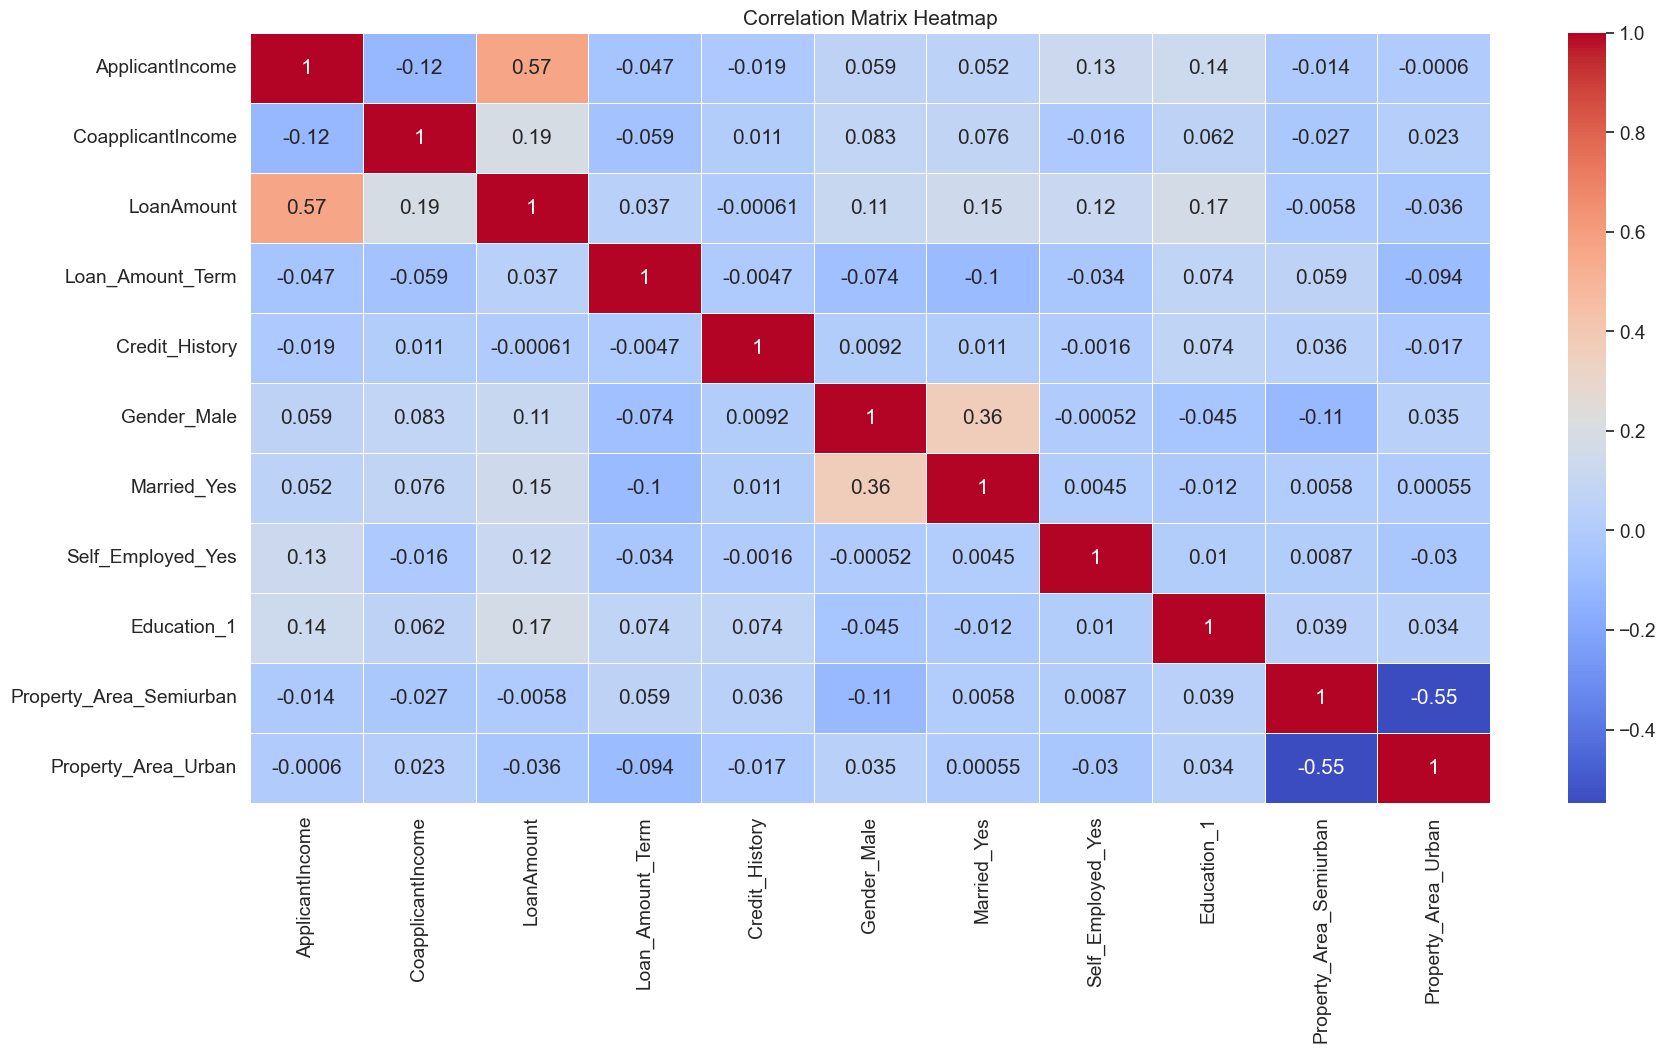

In [28]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation Matrix

In [29]:
correlation_matrix = data.corr()


In [30]:
print(correlation_matrix)

                         ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome                 1.000000          -0.116605    0.565181   
CoapplicantIncome              -0.116605           1.000000    0.189218   
LoanAmount                      0.565181           0.189218    1.000000   
Loan_Amount_Term               -0.046531          -0.059383    0.036960   
Credit_History                 -0.018615           0.011134   -0.000607   
Gender_Male                     0.058809           0.082912    0.106904   
Married_Yes                     0.051708           0.075948    0.146546   
Self_Employed_Yes               0.127180          -0.016100    0.115100   
Education_1                     0.140760           0.062290    0.168759   
Property_Area_Semiurban        -0.014246          -0.027044   -0.005804   
Property_Area_Urban            -0.000598           0.022776   -0.036050   

                         Loan_Amount_Term  Credit_History  Gender_Male  \
ApplicantIncome          

In [31]:
# Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:
# Total Income - combine the Applicant Income and Coapplicant Income. 
# If the total income is high, chances of loan approval might also be high.
# EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. 
# Idea behind making this variable is that people who have high EMI's might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
# Balance Income - This is the income left after the EMI has been paid. 
#Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

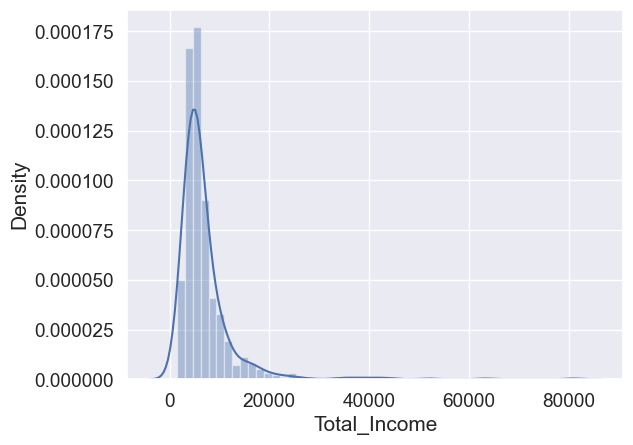

In [32]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome'] 
df['Total_Income']=df['ApplicantIncome']+df [ 'CoapplicantIncome']
sns.distplot(data['Total_Income'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


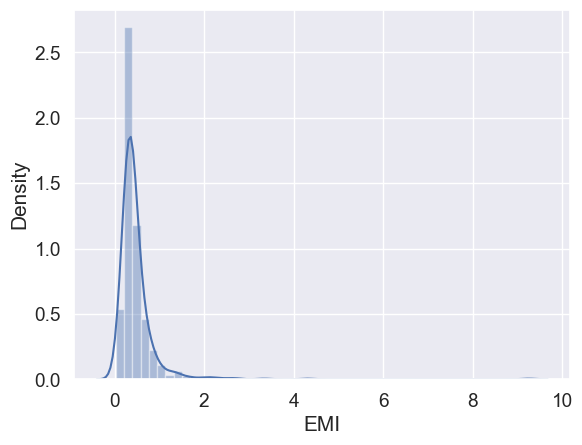

In [33]:
data['EMI']=data [ 'LoanAmount']/data['Loan_Amount_Term'] 
df['EMI']=df['LoanAmount']/df['Loan_Amount_Term']
sns.distplot(data ['EMI']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


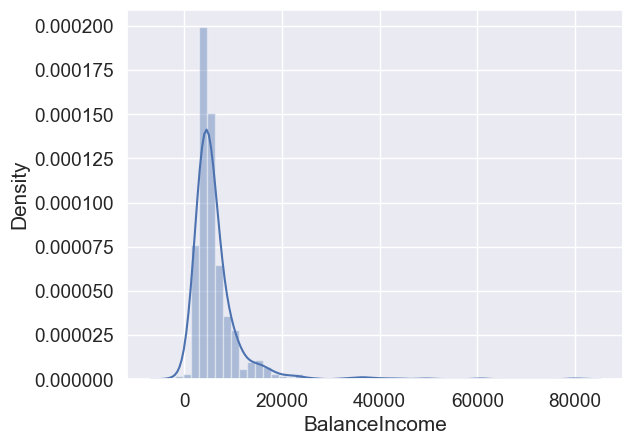

In [34]:
data['BalanceIncome']=data['Total_Income'] - (data['EMI']*1000) # Multiply with 1000 to make the units equal 
df['BalanceIncome']=df['Total_Income'] - (df['EMI']*1000)
sns.distplot (data [ 'BalanceIncome']);

In [35]:
data=data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
df=df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [36]:
data.columns

Index(['Dependents', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Self_Employed_Yes', 'Education_1',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Total_Income', 'EMI',
       'BalanceIncome'],
      dtype='object')

In [37]:
y = data['Loan_Status']
X = data.drop('Loan_Status', axis=1)


# Assuming 'X' is your feature matrix and 'y' is your target variable
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [39]:
#We'll perform SMOTE as both classes are not balanced

In [40]:
#We equalise the yes and No ka prob coz sample is kind of biased otherwise, agar balanced hoga toh result will be accurate
#as target variable is imbalenced so creatic the synthetic data with the help of oversampling the minority data so that it will contribute equally
#in the model
print("Before OverSampling, counts of label '1': {}".format(sum(train_y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
train_X_res, train_y_res = sm.fit_resample(train_X, train_y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(train_X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(train_y_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(train_y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(train_y_res == 0)))

Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 

After OverSampling, the shape of train_X: (684, 11)
After OverSampling, the shape of train_y: (684,) 

After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


[0.0605517  0.28101667 0.02305103 0.02005305 0.02688848 0.01896188
 0.02425542 0.01460023 0.176812   0.17235614 0.18145339]


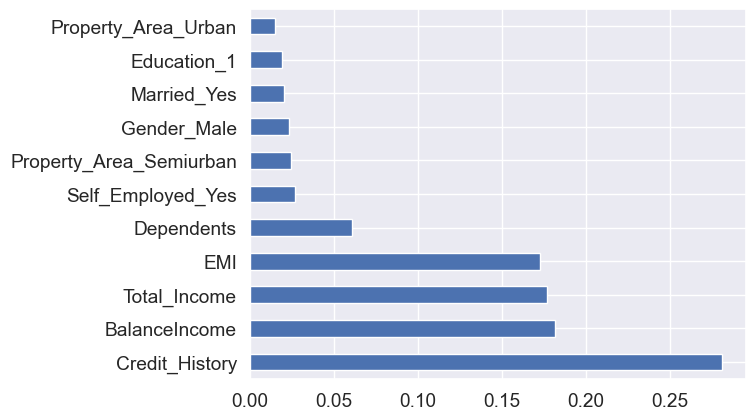

In [41]:
#FEATURE IMPORTANCE
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.rcParams["figure.figsize"] = (40,40)
plt.show()

In [42]:
train_y.head()

83     N
90     Y
227    Y
482    Y
464    N
Name: Loan_Status, dtype: object

# DecisionTreeClassifier()

Training Data Set Accuracy:  1.0
Training Data F1 Score:  1.0
Validation Mean F1 Score:  0.6674339693711975
Validation Mean Accuracy:  0.7005978148835291


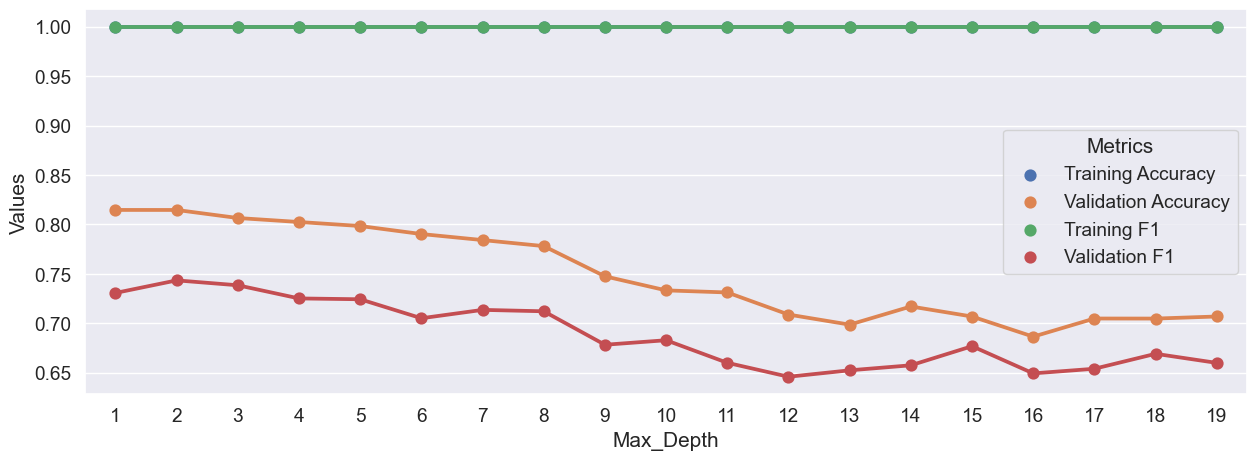

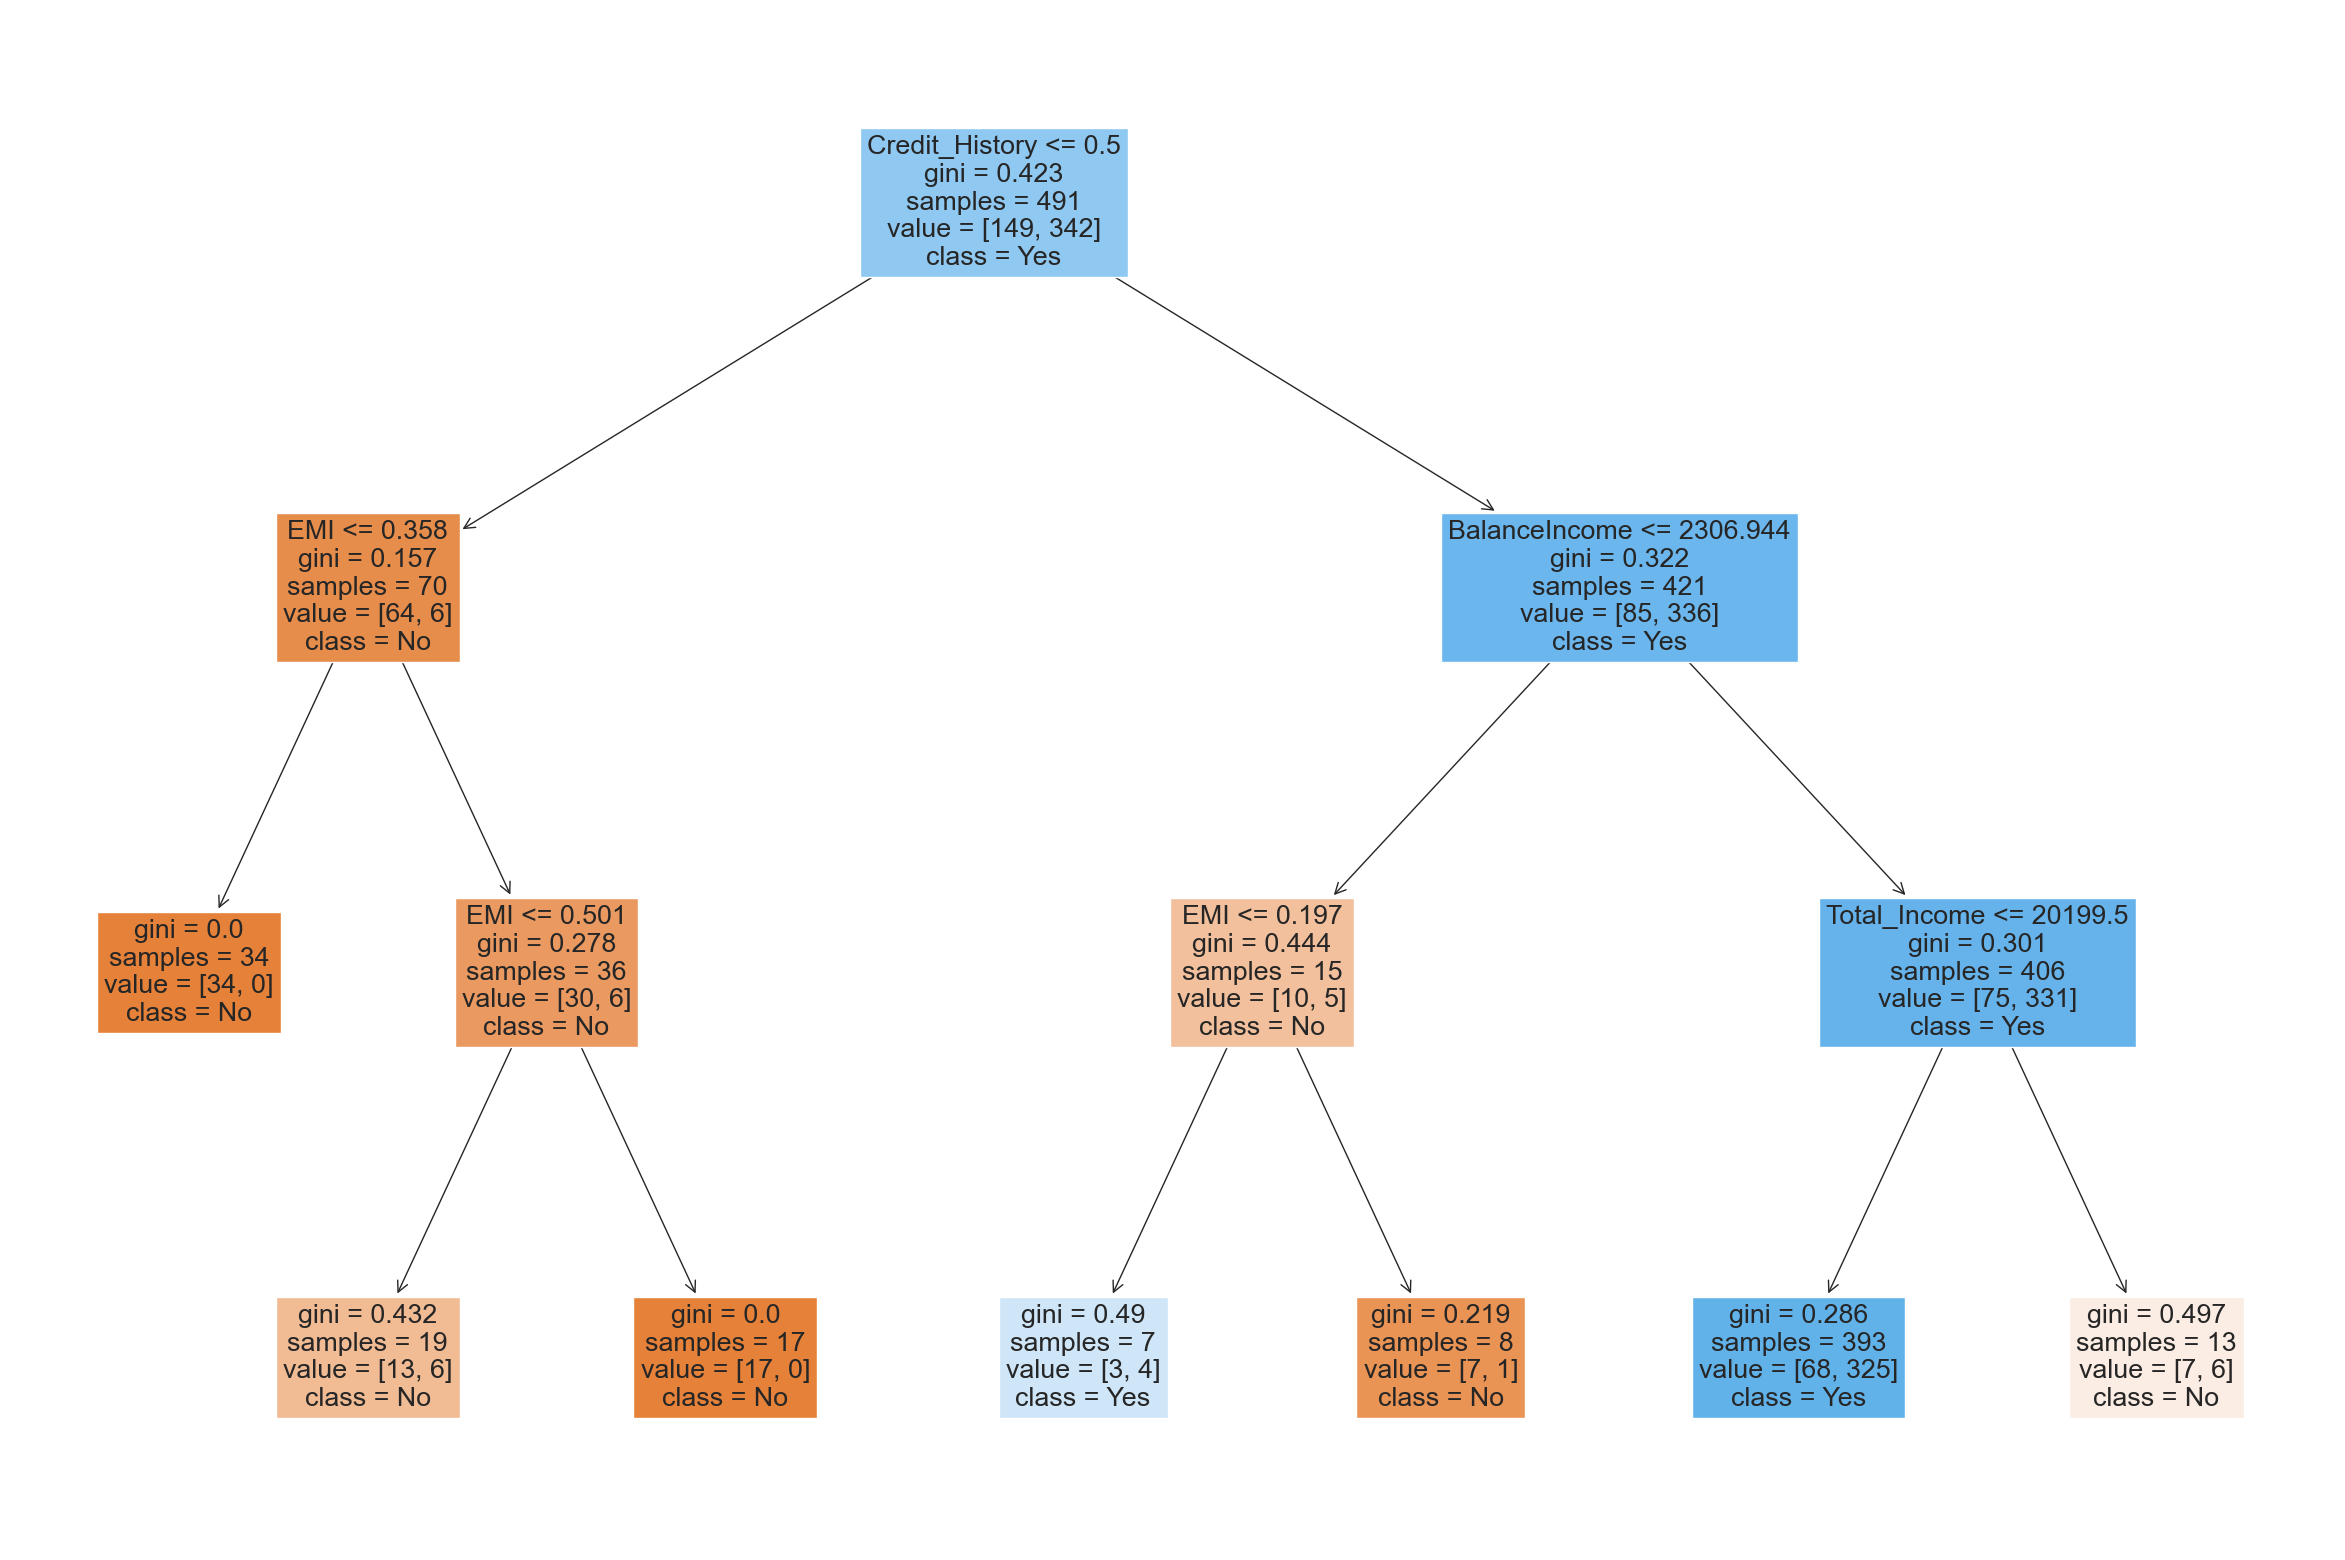

Test Accuracy:  0.7886178861788617
Test F1 Score:  0.8586956521739131
Confusion Matrix on Test Data


Predicted,N,Y,All
True,,,
N,18,25,43
Y,1,79,80
All,19,104,123


In [43]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_X, train_y)
y_pred = tree_clf.predict(train_X)
print("Training Data Set Accuracy: ", accuracy_score(train_y,y_pred))
print("Training Data F1 Score: ", f1_score(train_y, y_pred, pos_label='Y'))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,train_X, train_y,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,train_X, train_y,cv=5,scoring='accuracy').mean())


#Overfitting Problem
#We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. 
# Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.



#Hyper-parameter tuning- tuning 'Max_Depth' of tree

training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(train_X,train_y)
    y_training_pred = tree_clf.predict(train_X)

    training_acc = accuracy_score(train_y,y_pred)
    train_f1 = f1_score(train_y,y_pred,pos_label='Y')
    val_mean_f1 = cross_val_score(tree_clf,train_X,train_y,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,train_X,train_y,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)


Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

#From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test 
# Accuracy ~ 0.805; Optimum F1 Score: ~0.7

tree_clf = tree.DecisionTreeClassifier(max_depth=3)
tree_clf.fit(train_X, train_y)

feature_names = train_X.columns.tolist()

fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(tree_clf, feature_names=feature_names, class_names=["No", "Yes"], filled=True, ax=ax)

plt.show()

#From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit. 
# We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3


from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(train_X,train_y)
y_pred = tree_clf.predict(test_X)
print("Test Accuracy: ",accuracy_score(test_y,y_pred))
print("Test F1 Score: ",f1_score(test_y,y_pred,pos_label='Y'))
print("Confusion Matrix on Test Data")
pd.crosstab(test_y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Random Forest 

Train F1 Score  0.8862433862433863
Train Accuracy  0.824847250509165
Validation Mean F1 Score:  0.7285173949984975
Validation Mean Accuracy:  0.8166357452071737


<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

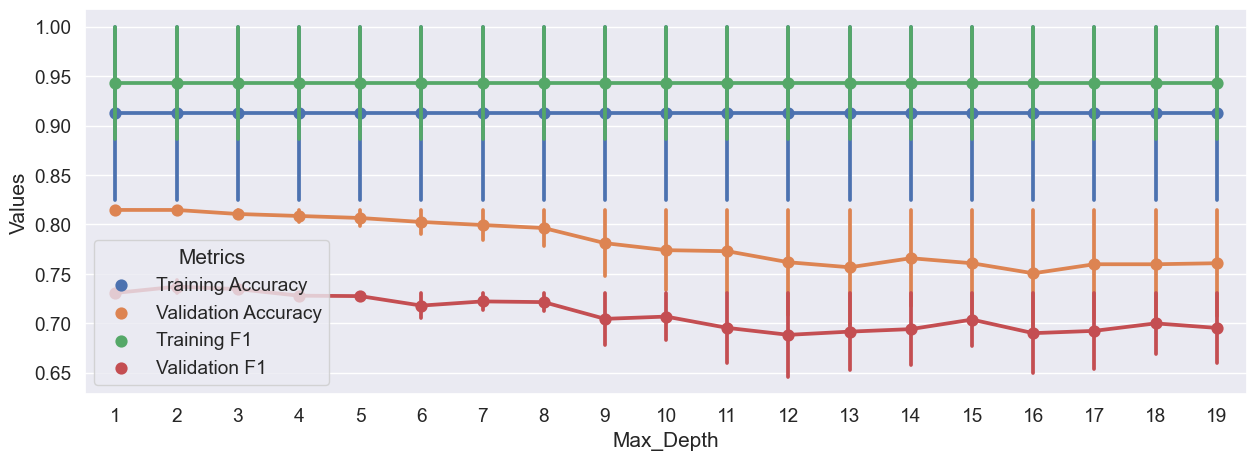

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(train_X,train_y)
y_pred = rf_clf.predict(train_X)
print("Train F1 Score ", f1_score(train_y,y_pred,pos_label='Y'))
print("Train Accuracy ", accuracy_score(train_y,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,train_X,train_y,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,train_X,train_y,cv=5,scoring='accuracy').mean())


for depth in range(1,20):
    rf_clf = RandomForestClassifier(max_depth=depth)
    rf_clf.fit(train_X,train_y)
    y_training_pred = tree_clf.predict(train_X)

    training_acc = accuracy_score(train_y,y_pred)
    train_f1 = f1_score(train_y,y_pred,pos_label='Y')
    val_mean_f1 = cross_val_score(tree_clf,train_X,train_y,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,train_X,train_y,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)


Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)




# KNN

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training Accuracy: 0.7494908350305499
Testing Accuracy: 0.5691056910569106


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

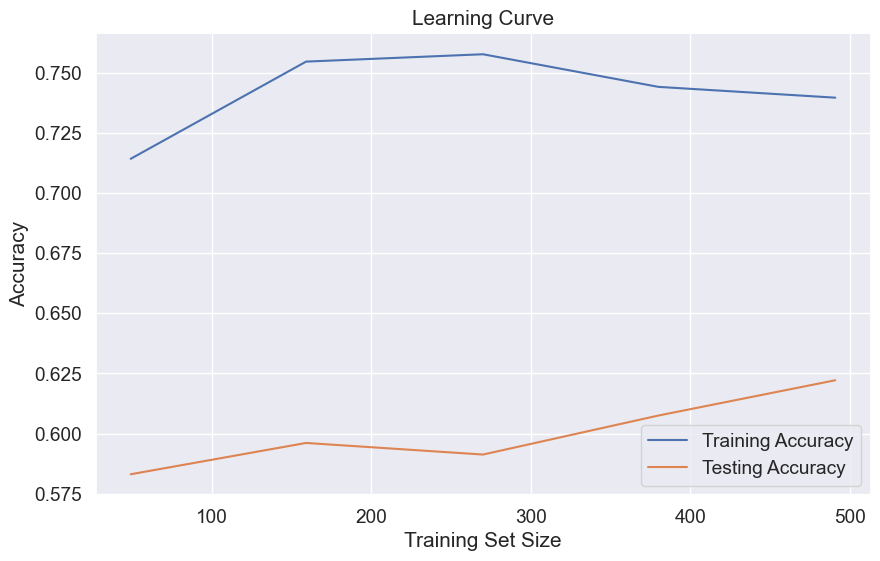

Cross-Validation Scores: [0.6504065  0.59349593 0.6097561  0.62601626 0.63114754]
Average CV Score: 0.6221644675463148


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [45]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(train_X, train_y)

# Make predictions on training and testing data
train_preds = knn.predict(train_X)
test_preds = knn.predict(test_X)

# Compare training and testing performance
train_accuracy = accuracy_score(train_y, train_preds)
test_accuracy = accuracy_score(test_y, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

In [46]:
test_X.head()

,Dependents,Credit_History,Gender_Male,Married_Yes,Self_Employed_Yes,Education_1,Property_Area_Semiurban,Property_Area_Urban,Total_Income,EMI,BalanceIncome
350,0,1.0,1,1,0,1,1,0,9083.0,0.633333,8449.666667
377,0,1.0,1,1,0,1,1,0,4310.0,0.361111,3948.888889
163,2,1.0,1,1,0,1,0,0,5614.0,0.438889,5175.111111
609,0,1.0,0,0,0,1,0,0,2900.0,0.197222,2702.777778
132,0,1.0,1,0,0,1,1,0,2718.0,0.194444,2523.555556


# Logistic Regression 


Accuracy of logistic regression classifier on test set: 0.63
[[ 0 43]
 [ 2 78]]


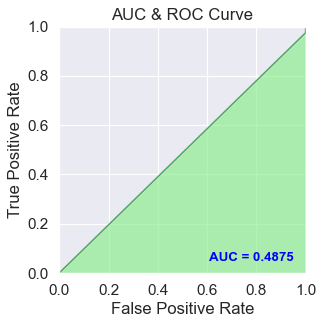

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

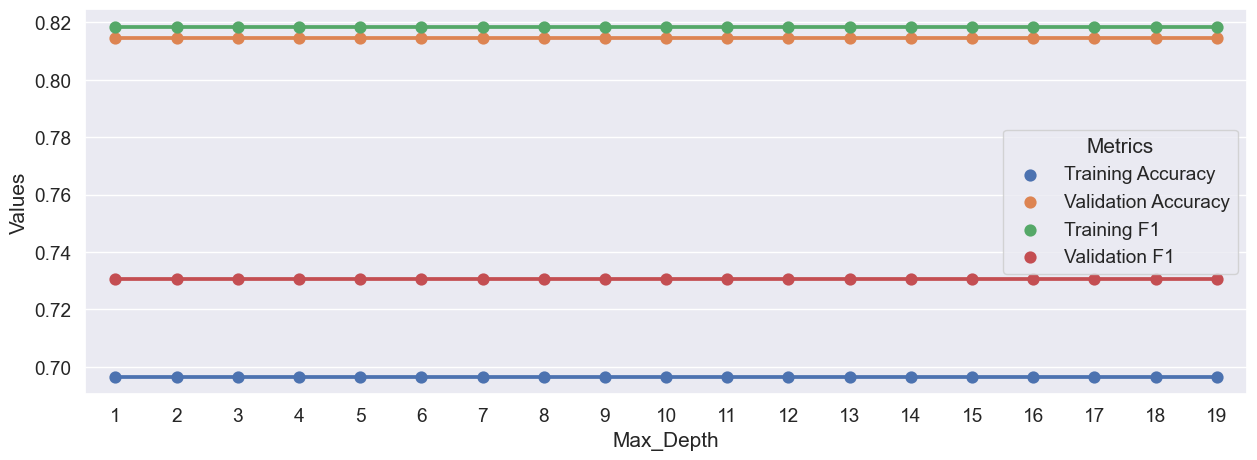

In [47]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

y_pred = logreg.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X, test_y)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred)
print(confusion_matrix)

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score

# Convert the 'Y' and 'N' labels to binary (1 and 0)
label_binarizer = LabelBinarizer()
test_y_binary = label_binarizer.fit_transform(test_y)

# Now, convert your y_pred 'Y' and 'N' labels to binary (1 and 0)
y_pred_binary = label_binarizer.transform(y_pred)

# Calculate ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y_binary, y_pred_binary)

# Calculate AUC
roc_auc = roc_auc_score(test_y_binary, y_pred_binary)

# Plot the ROC curve
plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()



#Hyper-parameter tuning- tuning 'Max_Depth' of tree

training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    logreg = LogisticRegression()
    logreg.fit(train_X, train_y)
    y_pred = logreg.predict(train_X)

    training_acc = accuracy_score(train_y,y_pred)
    train_f1 = f1_score(train_y,y_pred,pos_label='Y')
    val_mean_f1 = cross_val_score(tree_clf,train_X,train_y,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,train_X,train_y,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)


Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [48]:
#make variabel for save the result and to show it
classifier = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor')
y_pos = np.arange(len(classifier))
score = []


clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuration of Gradient Boosting is %.2f%%' %(scores.mean()*100))


clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuration of Random Forest is %.2f%%' %(scores.mean()*100))


clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuration of Decision Tree is %.2f%%' %(scores.mean()*100))



clf = KNeighborsClassifier()
scores = cross_val_score(clf, X, y,cv=5)
score.append(scores.mean())
print('The accuration of KNeighbors is %.2f%%' %(scores.mean()*100))


The accuration of Gradient Boosting is 77.37%
The accuration of Random Forest is 75.41%
The accuration of Decision Tree is 71.34%
The accuration of KNeighbors is 62.22%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

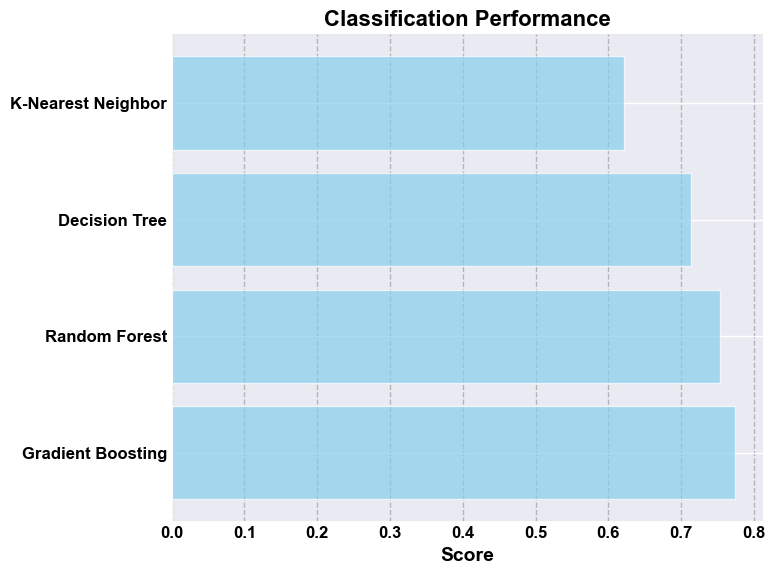

In [49]:
import matplotlib.pyplot as plt

# Define the figure size explicitly
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed

# Make the labels and titles more visible and bold
plt.barh(y_pos, score, align='center', alpha=0.7, color='skyblue')
plt.yticks(y_pos, classifier, fontsize=12, fontweight='bold', color='black')  # Increase font size and make it bold
plt.xticks(fontsize=12, fontweight='bold', color='black')  # Increase font size and make it bold
plt.xlabel('Score', fontsize=14, fontweight='bold', color='black')  # Label font size and style
plt.title('Classification Performance', fontsize=16, fontweight='bold', color='black')  # Title font size and style

# Customize the grid lines
plt.grid(axis='x', linestyle='--', alpha=0.5, color='gray')  # Add grid lines for better readability

# Remove the spines (the borders around the plot)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Customize the tick parameters
plt.tick_params(axis='both', which='both', length=0)  # Remove tick marks

# Show the plot
plt.tight_layout()  # Adjust the spacing for better appearance
plt.show()
